# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 1er parcial, 2020</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al ejercicio 2. Hay un notebook por ejercicio planteado.

* [Ejercicio 2 - Regresión polinómica y Curvas de Aprendizaje](#Ejercicio2) (40 puntos)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection

# Ejercicio 2

En este ejercicio se analizará el compromiso *sesgo-varianza* en el caso en que se desea encontrar el polinomio de orden $n$ que mejor aproxima la relación entre la variable medida $x$ y la salida $y$, siendo $x$ e $y$ escalares. La siguiente celda levanta los datos que se utilizarán en este ejercicio.  

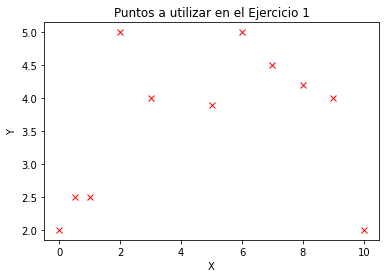

In [2]:
# se levantan los datos
filePath = "data/ejercicio1/polydata.dat"
file = open(filePath,'r')
allData = np.loadtxt(file, delimiter=',')

X = allData[:, [0]]
y = allData[:, [1]]

# plot curve
plt.figure()
plt.plot(X, y, 'rx')
plt.title('Puntos a utilizar en el Ejercicio 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Regresión Lineal Polinómica

En el caso en que el vector de características es unidimensional, la función aprendida a través de la regresión polinómica se escribe: 

\begin{equation}
h_d(x)= w_0 + w_1 x + w_2 x^2 + \ldots + w_d x^d  \quad \quad \text{(1)}
\label{eq:1}
\end{equation}

siendo $d$ el grado del polinomio.

<a id="Parte1"></a>
### Ejercicio 2 - parte a)  

Completar el código de la función `transformacion_polinomica()`. Dicha función implementa la transformación indicada en la Ecuación 1.

In [3]:
def transformacion_polinomica(X, d):
    '''
    Realiza la transformación polinómica de grado d de 
    las características almacenadas en X

    Entrada:
        X: arreglo de tamaño (N,1)
        d: grado del polinomio
    Salida:
        Z: arreglo de tamaño (N, d+1) que en la fila i, columna j
            almacena el valor x^j de la i-esima muestra con 0 <= j <=d 

    '''
    ###########################################################
    ######  Empieza espacio para completar código  ############
    ###########################################################

    N = X.shape[0]
    Z = np.zeros((N, d+1))
    for i in range(d+1):
        Z[:,i] = (X**i).squeeze()

    ###########################################################
    ######  Termina espacio para completar código  ############
    ###########################################################     
    
    return Z

Si la implementación de `transformacion_polinomica()` es correcta la siguiente celda debería ejecutarse sin errores.

In [4]:
np.random.seed(33)
X1 = np.random.randn(5,1)
d=3
Z1 = transformacion_polinomica(X1,d)
Z1_ = np.array([[ 1.        , -0.31885351,  0.10166756, -0.03241706],
       [ 1.        , -1.60298056,  2.56954666, -4.11893334],
       [ 1.        , -1.53521787,  2.35689391, -3.61834565],
       [ 1.        , -0.57040089,  0.32535718, -0.18558403],
       [ 1.        , -0.2167283 ,  0.04697116, -0.01017998]])
assert np.allclose(Z1,Z1_), 'Es posible que la implementación de transformación_polinomica no sea correcta'

<a id="Parte2"></a>
### Ejercicio 2 - parte b)  



Los parámetros óptimos $\mathbf{w}_{\textrm{reg}}$ del modelo lineal se obtendrán mediante la siguiente ecuación:   
\begin{equation}
\mathbf{w}_{\textrm{reg}} = (\mathbf{Z}^{\intercal}\mathbf{Z} + \lambda \mathbf{I})^{-1} \mathbf{Z}^{\intercal} \mathbf{y}  \qquad \qquad \text{(2)}
\end{equation}

Indique cuál es la optimización que da lugar a la solución planteada para $\mathbf{w}_{reg}$. En particular comente el rol que cumple $\lambda$ en dicha optimización.

**Respuesta:**   

Esta regularización es la que surge de restringir $\textbf{w}^T\textbf{w} \leq C\in\mathbb{R}$ al minimizar el error cuadrático medio. 

$\lambda$ es el factor de regularización, que es inversamente proporcional a C. Es decir, mientras mayor el valor de $\lambda$, más se está restringiendo la hipótesis.

<a id="Parte3"></a>
### Ejercicio 2 - parte c)  

Completar el código de la función `regresion_Ridge()`. Dicha función implementa la solución cerrada planteada en la Ecuación 2 con el agregado de que permite no regularizar el término de *bias*.

In [5]:
def regresion_Ridge(Z, y, reg = 0, regularizar_bias=False):
    
    '''
    Implementa la solución cerrada de la regresión de Ridge. En esta variante se
    permite elegir si se desea regularizar el bias (coeficiente w_0) o no.
    Entrada:
        Z: matríz de tamaño Nx(d+1) 
        y: valores objetivo
        reg: coeficiente que multiplica el término de regularización
        regularizar_bias: variable booleana que indica si se regulariza el término
                        de bias o no.
    Salida:
        w_reg: parámetros encontrados mediante la regularización de Ridge
    '''

    # Si no se regulariza el coeficiente w_0 se pone el elemento [0,0]
    # de la matríz identidad a cero      
    reg_matrix = np.identity(Z.shape[1])
    if not regularizar_bias:
        reg_matrix[0,0]=0
    
    ########################################################################
    ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ###################
    ########################################################################
    
    Z_dag_reg = np.linalg.inv(Z.T @ Z + reg*reg_matrix) 
    w_reg = Z_dag_reg @ Z.T @ y
    
    ########################################################################
    ############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ###################
    ########################################################################
    
    return w_reg
    

La siguiente celda debería ejecutarse sin errores si la implementación de `regresion_Ridge()` es correcta.

In [6]:
np.random.seed(43)
y3 = np.random.randn(9)
Z3 = np.random.randn(9,7)
Z3[:,0]=1
w3 = regresion_Ridge(Z3, y3, reg = 0, regularizar_bias=False )
w3_ = np.array([ 0.99480683, -1.02402373,  0.40146952,  0.21686739,  0.23815722, -1.23370181,
 -0.64320162])
assert np.allclose(w3, w3_), 'Revisar el caso en que reg=0 y regularizar_bias=False'

w3 = regresion_Ridge(Z3, y3, reg = 3.3, regularizar_bias=False )
w3_ = np.array([ 0.58610027, -0.09425186,  0.12976429,  0.11544501,  0.14085992, -0.39307442,
 -0.20333349]
)
assert np.allclose(w3, w3_), 'Revisar el caso en que reg!=0 y regularizar_bias=False'

w3 = regresion_Ridge(Z3, y3, reg = 3.3, regularizar_bias=True )
w3_ = np.array([ 0.36661236, -0.12162972,  0.12337695,  0.10003963,  0.10963488, -0.27366233,
 -0.17657389]

)
assert np.allclose(w3, w3_), 'Revisar el caso en que reg!=0 y regularizar_bias=True'

<a id="Parte4"></a>
### Ejercicio 2 - parte d)  

Completar el código de la función `regresion_polinomica()`. Dicha función encuentra los coeficientes de la regresión polinómica siguiendo los siguientes pasos:

1. Realiza la transformación polinómica de grado $d$ de las características
2. Cuando el argumento de entrada `estandarizar=True`, estandariza las características en el espacio transformado. La componente del vector de características correspondiente al témino de *bias* **no** debe estandarizarse. 
3. Encuentra los coeficientes de la regresión polinómica

Además de los coeficientes de la regresión polinómica, la función devuelve las medias y varianzas utilizadas al estandarizar. Cuando `estandarizar=False` las medias devueltas valen cero y las desviaciones estándar valen 1.

In [7]:
def regresion_polinomica(X, y, d, reg_factor, estandarizar=False):
    '''
    Encuentra los coeficientes de una regresión polinomica de grado d. 
    Cuando estandarizar=True las características son estandarizadas luego 
    de realizar la transformación polinómica y antes de encontrar los coeficientes
    de la regresión lineal.
    
     Entrada:
        X: arreglo de tamaño (N,1)
        y: arreglo de tamaño (N,) a la que mapean los valores de X 
        d: grado del polinomio
        reg_factor: coeficiente de la regularización de Ridge. No se regularizara
                    el término de bias.
    Salida:
        medias: arreglo de tamaño (d+1) con las medias utilizadas 
                en la  estandarización
        std_dev: arreglo de tamaño (d+1) con las desviaciones estandar 
                 utilizadas en la estandarización       
        w: arreglo de largo d+1 con los coeficientes de la regresión
    '''
    
    medias = np.zeros(d+1)
    std_dev = np.ones(d+1)
   
    ###########################################################
    ######  Empieza espacio para completar código  ############
    ###########################################################

    # se realiza la transformación polinómica
    Xt = transformacion_polinomica(X, d)
    
    # cuando corresponde se actualizan los arreglos medias y std_dev
    # y se estandarizan las características en el espacio transformado 
    if estandarizar:
        medias = np.average(Xt, axis=0) 
        std_dev = np.std(Xt, axis=0)
    
    Xt_std = np.ones(Xt.shape)
    Xt_std[:,1:] = (Xt[:,1:]-medias[1:])/std_dev[1:]
    
    # se estima el vector de pesos 
    w = regresion_Ridge(Xt_std, y, reg=reg_factor)
    
    ###########################################################
    ######  Termina espacio para completar código  ############
    ########################################################### 
    return w, medias, std_dev

<a id="Parte5"></a>
### Ejercicio 2 - parte e)  

Para estimar el valor de un conjunto de características con el modelo aprendido se utilizará la función `predecir()`. Completar el código de dicha función. Observar que además de recibir el arreglo con las características y los pesos del modelo aprendido, la función recibe las medias y desviaciones estándar utilizadas para entandarizar las características de entrenamiento.

In [8]:
def predecir(X, w, medias, std_dev):
    '''
    Entrada:
        X: arreglo de tamaño (N,1) con los valores a predecir
        w: arreglo de tamaño (d+1) con los coeficientes del modelo lineal
        medias: medias utilizadas para estandarizar los datos en el espacio transformado
        std_dev: desviaciones estandar utilizadas para estandarizar los datos en el espacio transformado
    Salida:
        y_pred: valores estimados
    '''
    ###########################################################
    ######  Empieza espacio para completar código  ############
    ###########################################################
    
    Xt = transformacion_polinomica(X, w.shape[0]-1)
    Xt_std = np.ones(Xt.shape)
    Xt_std[:,1:] = (Xt[:,1:]-medias[1:])/std_dev[1:]
    y_pred = Xt_std @ w
    
    ###########################################################
    ######  Termina espacio para completar código  ############
    ########################################################### 
    
    return y_pred

### Test de la Regresión Polinómica

La siguiente celda encuentra el polinomio de grado 8 que mejor se ajusta a los datos de entrenamiento. Ejecutarla y verificar que los resultados son similares a los de la figura.

![Regresion Polinómica](imgs/regresion_polinomica.png)

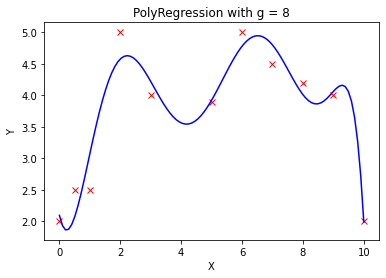

In [9]:
# regresión con un polinomio de grado 8
g = 8
w, medias, std_dev  = regresion_polinomica(X,y,g, reg_factor=0, estandarizar=True)

# output predictions
xpoints = np.linspace(np.max(X), np.min(X), 100).reshape(-1, 1)
ypoints = predecir(xpoints, w, medias, std_dev)

# plot curve
plt.figure()
plt.plot(X, y, 'rx')
plt.title('PolyRegression with g = '+str(g))
plt.plot(xpoints, ypoints, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Curvas de aprendizaje

En este sección se analizará el compromiso sesgo-varianza utilizando las curvas de aprendizaje.  

<a id="Parte6"></a>
### Ejercicio 2 - parte f)  

Completar la función `curva_de_aprendizaje()`.  La función devuelve dos arreglos de tamaño igual al conjunto de entrenamiento. El *i-ésimo* indice del arreglo corresponde al error cometido con el conjunto de entrenamiento/test al entrenar con *i+1* muestras. Tomar en cuenta que:  

a) El punto $i$ de la curva de aprendizaje se debe obtener a partir de entrenar con las muestras $Xtrain[0:i]$ con $i=1, \ldots, N$.    
b) Como preprocesamiento, antes de encontrar los coeficientes del modelo, se realizará estandarización de los datos.      
c) El error de entrenamiento  se debe calcular sobre las muestras que efectivamente se utilizaron para entrenar mientras que el error en test se debe calcular sobre todas las muestras del conjunto de test.     

A los efectos del ejercicio no será necesario alterar el orden de las muestras de entrenamiento ni promediar los resultados de muchas realizaciones.

In [21]:
def curva_de_aprendizaje(Xtrain, Ytrain, Xtest, Ytest, reg_lambda, grado):
    '''
    Estima la curva de aprendizaje para un conjunto de entrenamiento Xtrain, Ytrain y un
    conjunto de test Xtest, Ytest. El entrenamiento de los modelos deberá realizarse a partir de 
    características estandarizados.

    Entrada:
        Xtrain: arreglo de (N,1), características del conjunto de entrenamiento
        Ytrain: arreglo de (N,), etiquetas del conjunto de entrenamiento
        Xtest: arreglo de (N,1), características del conjunto de test
        Ytest: arreglo de (N,), etiquetas del conjunto de test
        reg_lambda: factor de regularización
        grado: grado de la transformación polinomial que se aplica a los datos de entrada

    Salida:
        curva_train: curva_train[i] es el error cometido en las muestras de entrenamiento Xtrain[0:(i+1)] 
                     con el modelo entrenado con Xtrain[0:(i+1)]
        curva_test: curva_test[i] es el error en el conjunto de test del modelo entrenado con Xtrain[0:(i+1)]
    '''

    N = len(Xtrain)

    curva_train = np.zeros(N)
    curva_test = np.zeros(N)


    # se comienza en g porque se necesitan al menos g+1 muestras para determinar 
    # los coeficientes de un polinomio de grado g
    for i in range(grado, N):
        
        ###########################################################
        ######  Empieza espacio para completar código  ############
        ###########################################################
        w, medias, std_devs = regresion_polinomica(Xtrain[:i+1], Ytrain[:i+1], d=grado, 
                                                   reg_factor=reg_lambda, estandarizar=True)

        Ytrain_pred = predecir(Xtrain[0:i+1], w, medias, std_devs)
        Ein = (1/(i+1))*np.sum((Ytrain_pred - Ytrain[0:i+1])**2)
        curva_train[i] = Ein

        Ytest_pred = predecir(Xtest, w, medias, std_devs)
        Eout = (1/Ytest.shape[0])*np.sum((Ytest_pred - Ytest)**2)
        curva_test[i] = Eout

        ###########################################################
        ######  Termina espacio para completar código  ############
        ###########################################################
        
    return curva_train, curva_test

Se provee una función para graficar las curvas de aprendizaje.

In [19]:
def mostrar_curva_aprendizaje(curva_train, curva_test, reg_factor, grado):
    '''
        Muestra la curva de aprendizaje
    '''
    minX = 1
    maxY = 4 #max(curva_test[minX+1:])

    xs = 1 + np.arange(len(curva_train))
    plt.plot(xs[grado:], curva_train[grado:], 'r-o')
    plt.plot(xs[grado:], curva_test[grado:], 'b-o')
    #plt.plot(xs, np.ones(len(xs)), 'k--')
    plt.legend(['Error entrenamiento', 'Error test'], loc='best')
    plt.title('Curva de aprendizaje (g='+str(grado)+', lambda='+str(reg_factor)+')')
    plt.xlabel('Número de muestras de entrenamiento')
    plt.ylabel('Error')
    #plt.yscale('log')
    plt.ylim(0,maxY)
    plt.xlim((minX, 11))
    plt.grid()

La siguiente celda genera una curva de aprendizaje promedio mediante validación cruzada *leave-one-out*. Para cada uno de los subconjuntos de entrenamiento/test obtenidos estima la curva de aprendizaje utilizando la función `curva_de_aprendizaje()` implementada más arriba y luego las promedia. 

In [16]:
def generar_curva_leave_one_out(X, y, grado, reg_factor):
    '''
        Genera una curva de aprendizaje mediante validación 
        cruzada utilizano el criterio leave-one-out
    '''

    n = len(X)

    training_errors = np.zeros((n, n-1))
    testing_errors = np.zeros((n, n-1))

    loo = model_selection.LeaveOneOut()
    i = 0
    for train_index, test_index in loo.split(X):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        (errTrain, errTest) = curva_de_aprendizaje(X_train, y_train, X_test, y_test, reg_factor, grado)

        training_errors[i, :] = errTrain
        testing_errors[i, :] = errTest
        i = i + 1

    curva_train = training_errors.mean(axis=0)
    curva_test = testing_errors.mean(axis=0)

    mostrar_curva_aprendizaje(curva_train, curva_test, reg_factor, grado)

La siguiente celda levanta un conjunto de datos y estima la **curva de aprendizaje promedio** para distintos factores de regularización y grados de la transformación polinómica. Ejecutarlo y corroborar que los resultados son similares a los de la figura que se muestra más abajo.  

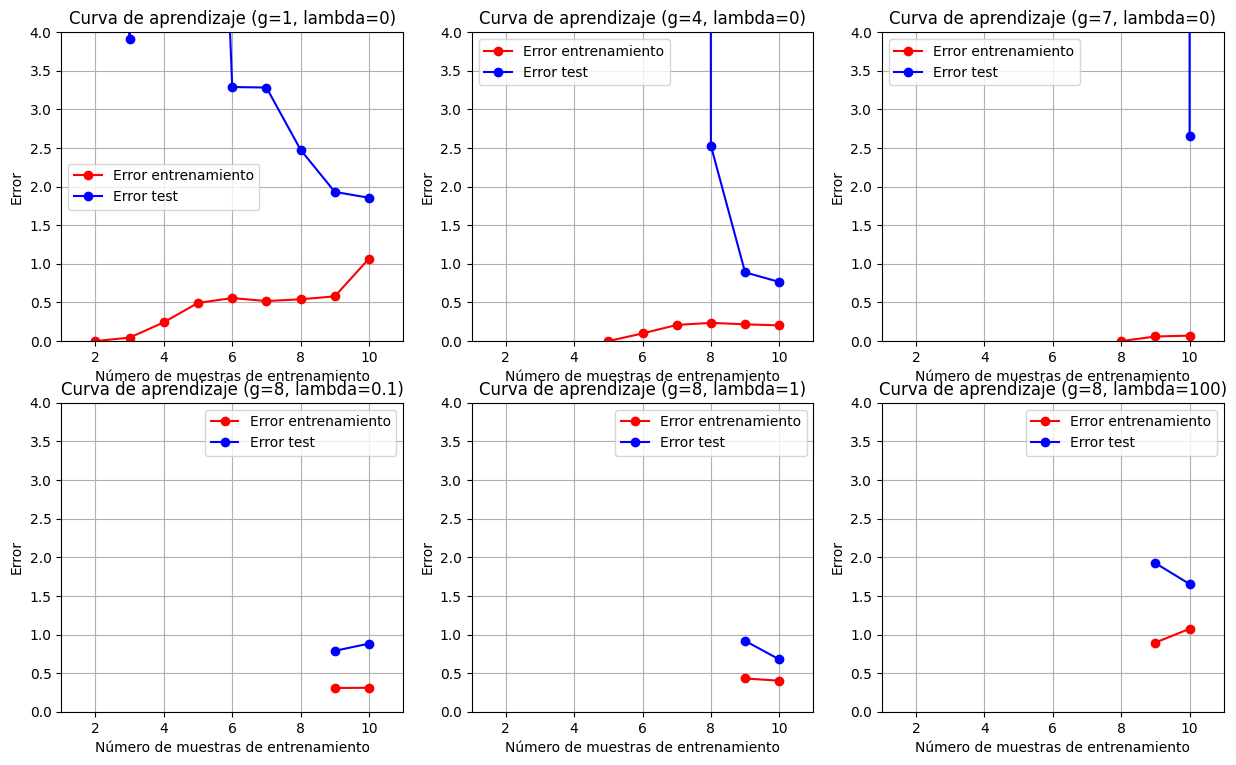

In [22]:
# se generan las curvas de aprendizaje para distintos grado de polinomio y factores de regularización
plt.figure(figsize=(15, 9), dpi=100)
plt.subplot(2, 3, 1)
generar_curva_leave_one_out(X, y, 1, 0)
plt.subplot(2, 3, 2)
generar_curva_leave_one_out(X, y, 4, 0)
plt.subplot(2, 3, 3)
generar_curva_leave_one_out(X, y, 7, 0)
plt.subplot(2, 3, 4)
generar_curva_leave_one_out(X, y, 8, .1)
plt.subplot(2, 3, 5)
generar_curva_leave_one_out(X, y, 8, 1)
plt.subplot(2, 3, 6)
generar_curva_leave_one_out(X, y, 8, 100)
plt.show()

![Curva de aprendizaje](imgs/curvas_aprendizaje.png)

<a id="Parte7"></a>
### Ejercicio 2 - parte g)  

Asumiendo que los resultados son los que se muestran en la figura de arriba y tomando en cuenta que:
 - Se dispone de errores de entrenamiento y test cuando el número de muestras utilizadas en el entrenamiento es mayor que el grado del polinomio.
 - El rango mostrado en el *eje y* es [0, 4] para todas las gráficas.     
 - Cuando para un determinado número de muestras de entrenamiento se muestra sólo el error con el conjunto de entrenamiento (punto rojo) es porque el error en el conjunto de test es mayor que 4. 
 
Responder a las siguientes preguntas:

**Pregunta 2.g.1:** En el modelo sin regularizar, cuando *g=1* el error de entrenamiento es muy alto comparado con *g=4* y *g=7*. ¿Es esto debido a que el modelo tiene un alto sesgo? Justifique su respuesta.

**Respuesta:**   

En el caso de g=4, efectivamente el sesgo es menor. En el caso de g=7, no se puede determinar el sesgo.

Lo que realmente se entra en juego en este caso es el sobreajuste. Mientras más compleja es nuestra hipotesis, más se ajusta nuesto modelos a los datos de entrenamiento, por lo que el error de entrenamiento disminuye. Esto no se traduce directamente a un menor sesgo, es más, se puede observar que el polinomio de grado 4 tiene un menor sesgo que el polinomio de grado 

**Pregunta 2.g.2:** En el caso del modelos sin regularizar con $g=7$. ¿Cómo es la varianza respecto al modelo $g=1$?

**Respuesta:**   

La varianza parece ser mucho mayor. Al no poder observar claramente la asíntota no se puede dar una respuesta concreta, pero coincide con lo esperado teoricamente. Mientras más compleja es nuestra hipótesis más se sobreajusta nuestro modelo a nuestro los datos, generando un aumento en la varianza. 

**Pregunta 2.g.3:** Las tres gráficas de abajo muestran la evolución del error de test en función de la regularización cuando **g=8**. En el caso en que el **número de muestras** de entrenamiento es **10**, compárelas en términos del compromiso sesgo-varianza indicando cuál de las situaciones considera más favorable.

**Respuesta:**    

La más favorable es para $\lambda=1$, donde el tanto el sesgo como la varianza parecen ser mínimos.